In [1]:
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope
import tensorflow as tf
import random
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
tf.set_random_seed(777)

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [11]:
# parameters
learning_rate = 0.01 # we can use large learning rate using Batch Normalization
training_epochs = 15
batch_size = 100
keep_prob = 0.7

In [12]:
# input placeholders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
train_mode = tf.placeholder(tf.bool, name = 'train_mode')

In [13]:
# layer output size
hidden_output_size = 512
final_output_size = 10

In [14]:
xavier_init = tf.contrib.layers.xavier_initializer()
bn_params = {
    'is_training' : train_mode,
    'decay' : 0.9,
    'updates_collections' : None
}

In [15]:
# We can build short code using 'arg_scope' to avoid duplicate code
# same function with different arguments
with arg_scope([fully_connected], 
               activation_fn = tf.nn.relu, 
               weights_initializer = xavier_init, 
               biases_initializer = None, 
               normalizer_fn = batch_norm, 
               normalizer_params = bn_params) :
    
    hidden_layer1 = fully_connected(X, hidden_output_size, scope = 'h1')
    h1_drop = dropout(hidden_layer1, keep_prob, is_training = train_mode)
    
    hidden_layer2 = fully_connected(h1_drop, hidden_output_size, scope = 'h2')
    h2_drop = dropout(hidden_layer2, keep_prob, is_training = train_mode)
    
    hidden_layer3 = fully_connected(h2_drop, hidden_output_size, scope = 'h3')
    h3_drop = dropout(hidden_layer3, keep_prob, is_training = train_mode)
    
    hidden_layer4 = fully_connected(h3_drop, hidden_output_size, scope = 'h4')
    h4_drop = dropout(hidden_layer4, keep_prob, is_training = train_mode)
    
    hypothesis = fully_connected(h4_drop, final_output_size, activation_fn=None, scope = 'hypothesis')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [17]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [18]:
# train my model
for epoch in range(training_epochs) :
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch) :
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict_train = {X : batch_xs, Y : batch_ys, train_mode : True}
        feed_dict_cost = {X : batch_xs, Y : batch_ys, train_mode : False}
        opt = sess.run(optimizer, feed_dict = feed_dict_train)
        c = sess.run(cost, feed_dict = feed_dict_cost)
        avg_cost += c / total_batch
        
    print("[Epoch : {:>4}] cost = {:>.9}".format(epoch+1, avg_cost))
    
print('Learning Finished!')

[Epoch :    1] cost = 0.380067267
[Epoch :    2] cost = 0.330514684
[Epoch :    3] cost = 0.321433556
[Epoch :    4] cost = 0.317025316
[Epoch :    5] cost = 0.312410492
[Epoch :    6] cost = 0.31052344
[Epoch :    7] cost = 0.30885504
[Epoch :    8] cost = 0.306380156
[Epoch :    9] cost = 0.305615365
[Epoch :   10] cost = 0.304926642
[Epoch :   11] cost = 0.304275033
[Epoch :   12] cost = 0.302367177
[Epoch :   13] cost = 0.303451769
[Epoch :   14] cost = 0.302299433
[Epoch :   15] cost = 0.302211627
Learning Finished!


In [19]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy : ', sess.run(accuracy, feed_dict = {X : mnist.test.images, Y : mnist.test.labels, train_mode : False}))

Accuracy :  0.9837


Label :  [3]
Prediction :  [3]


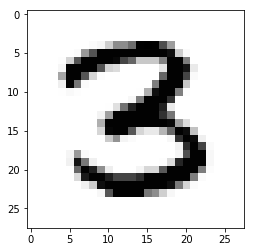

In [21]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples-1)
print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction : ", sess.run(tf.argmax(hypothesis, 1), 
                                feed_dict = {X : mnist.test.images[r:r+1], train_mode : False}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()